In [1]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.utils import np_utils
from keras.datasets import mnist
import pandas as pd
import numpy as np
from sklearn import metrics
from keras.optimizers import Adam
from keras import backend as K
from keras import initializers
from keras.layers import LeakyReLU
from keras.layers import Input
from keras.models import Model
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
randomDim=100
#better result when dimensionality is 10
(X_train, y_train),(X_test, y_test)=mnist.load_data()
X_train = (X_train.astype('float32') - 127.5)/127.5
X_train = X_train.reshape(60000, 784)
print(X_train.shape)

(60000, 784)


In [3]:
#optmizer
adam = Adam(lr=0.002 , beta_1 = 0.5)

In [4]:
#generator
generator = Sequential()
generator.add(Dense(256, input_dim=randomDim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))

In [5]:
#discriminator
discriminator = Sequential()
discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

In [6]:
# Combined Network.  - 
discriminator.trainable = False
ganInput=Input(shape=(randomDim,))
x=generator(ganInput)
ganOutput=discriminator(x)
gan = Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss = 'binary_crossentropy', optimizer=adam)

In [7]:
dLosses=[]
gLosses=[]

In [8]:
# plotting loss from each batch


def plotLossBatch(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Disc. loss')
    plt.plot(gLosses, label='Gen. loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    

# plotting the generated images


def plotGenImg(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    genimgs = generator.predict(noise)
    genimgs = genimgs.reshape(examples, 28, 28)
    plt.figure(figsize=figsize)
    
    for i in range(genimgs.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(genimgs[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    
    plt.tight_layout()
    

In [9]:
def train(epochs=1, batchsize=128):
    batch_count = X_train.shape[0] / batchsize
    print("Epochs train : ", epochs)
    print("batchsize train : ", batchsize)
    print("btach count train : ", batch_count)
    
    for e in range(1, epochs + 1):
        print("-" * 50)
        print("Epoch {}".format(e))
        
        for _ in tqdm(range(int(batch_count))):
            # using a random set of images and noise as input
            noise = np.random.normal(0, 1, size=[batchsize, randomDim])
            imgbatch = X_train[np.random.randint(0, X_train.shape[0], size=batchsize)]
            
            # generating fake images
            genimgs = generator.predict(noise)
            X = np.concatenate([imgbatch, genimgs])
            ydisc = np.zeros(2*batchsize)
            ydisc[:batchsize] = 0.9
            
            # training discriminator
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, ydisc)
            
            # training generator
            noise = np.random.normal(0, 1, size=[batchsize, randomDim])
            ygen = np.ones(batchsize)
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, ygen)
        
        dLosses.append(dloss)
        gLosses.append(gloss)
        
        if e == 1 or e % 20 == 0:
            plotGenImg(e)
    
    plotLossBatch(e)

  0%|          | 0/468 [00:00<?, ?it/s]

Epochs train :  20
batchsize train :  128
btach count train :  468.75
--------------------------------------------------
Epoch 1


  0%|          | 1/468 [00:00<01:24,  5.54it/s]

--------------------------------------------------
Epoch 2


  0%|          | 1/468 [00:00<01:14,  6.30it/s]

--------------------------------------------------
Epoch 3


  0%|          | 1/468 [00:00<01:14,  6.23it/s]

--------------------------------------------------
Epoch 4


  0%|          | 1/468 [00:00<01:14,  6.24it/s]

--------------------------------------------------
Epoch 5


  0%|          | 1/468 [00:00<01:27,  5.35it/s]

--------------------------------------------------
Epoch 6


  0%|          | 1/468 [00:00<01:17,  6.06it/s]

--------------------------------------------------
Epoch 7


  0%|          | 1/468 [00:00<01:26,  5.39it/s]

--------------------------------------------------
Epoch 8


  0%|          | 1/468 [00:00<01:18,  5.95it/s]

--------------------------------------------------
Epoch 9


  0%|          | 1/468 [00:00<01:15,  6.19it/s]

--------------------------------------------------
Epoch 10


  0%|          | 1/468 [00:00<01:29,  5.21it/s]

--------------------------------------------------
Epoch 11


  0%|          | 1/468 [00:00<01:31,  5.10it/s]

--------------------------------------------------
Epoch 12


  0%|          | 1/468 [00:00<01:28,  5.30it/s]

--------------------------------------------------
Epoch 13


  0%|          | 1/468 [00:00<01:16,  6.12it/s]

--------------------------------------------------
Epoch 14


  0%|          | 0/468 [00:00<?, ?it/s]

--------------------------------------------------
Epoch 15


  0%|          | 1/468 [00:00<01:31,  5.12it/s]

--------------------------------------------------
Epoch 16


  0%|          | 1/468 [00:00<01:23,  5.60it/s]

--------------------------------------------------
Epoch 17


  0%|          | 1/468 [00:00<01:15,  6.19it/s]

--------------------------------------------------
Epoch 18


  0%|          | 1/468 [00:00<01:21,  5.70it/s]

--------------------------------------------------
Epoch 19


  0%|          | 1/468 [00:00<01:19,  5.88it/s]

--------------------------------------------------
Epoch 20


100%|██████████| 468/468 [01:20<00:00,  5.80it/s]


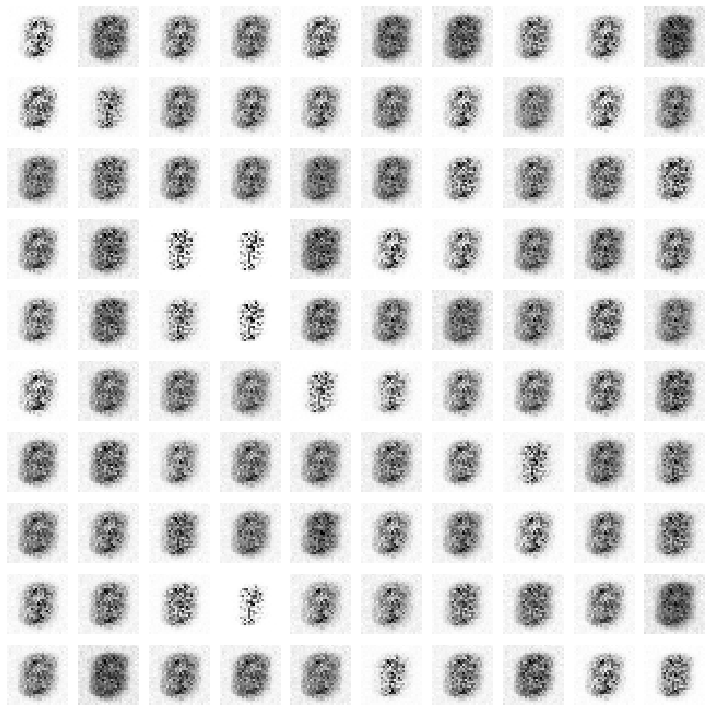

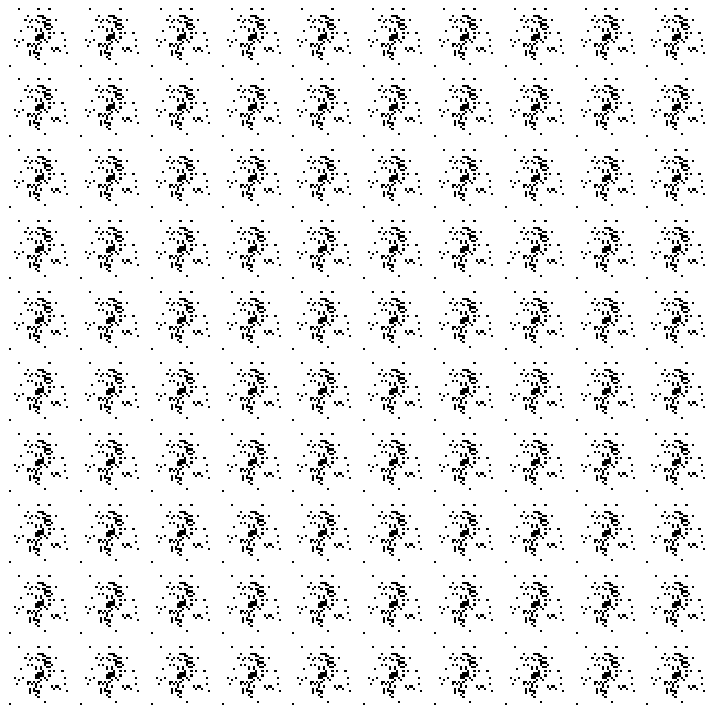

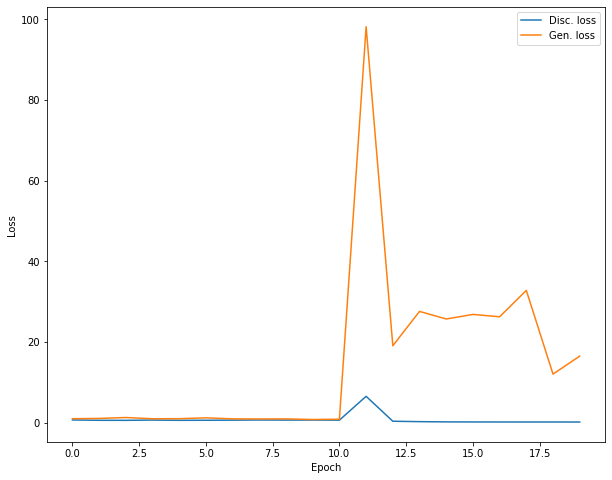

In [10]:
if __name__ == '__main__':
    train(20,128)